In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('Placement.csv')


In [ ]:
df.shape

(1000, 5)

In [ ]:
df.head()

,Student_ID,CGPA,Internships,Placed,Salary (INR LPA)
0,1,7.90,3,Yes,17.63
1,2,7.39,0,Yes,28.37
2,3,8.02,2,Yes,8.95
3,4,8.72,4,Yes,22.59
4,5,7.31,2,Yes,19.67


In [ ]:
import matplotlib.pyplot as plt

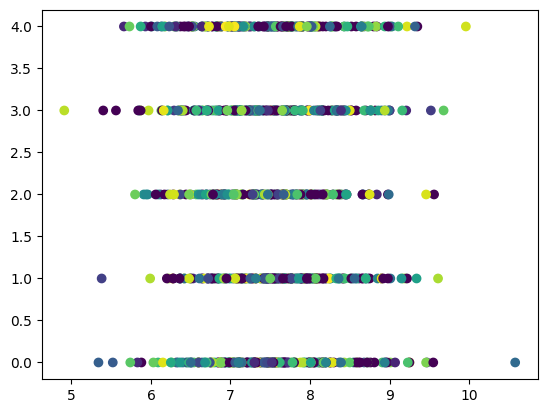

In [ ]:
plt.scatter(df['CGPA'],df['Internships'],c=df['Salary (INR LPA)'])

In [ ]:
x=df.iloc[:,0:2]
x.shape

(1000, 2)

In [ ]:
x

,Student_ID,CGPA
0,1,7.90
1,2,7.39
2,3,8.02
3,4,8.72
4,5,7.31
...,...,...
995,996,7.28
996,997,8.94
997,998,8.01
998,999,7.04


In [ ]:
y=df.iloc[:,-1]
y.shape

(1000,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train

,Student_ID,CGPA
414,415,7.77
850,851,7.00
909,910,9.23
448,449,7.09
864,865,7.01
...,...,...
853,854,8.45
169,170,6.90
578,579,6.32
787,788,7.87


In [ ]:
y_train

,Salary (INR LPA)
414,24.24
850,23.35
909,21.31
448,29.12
864,0.00
...,...
853,12.07
169,0.00
578,19.04
787,3.68


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_train


array([[-0.25408649,  0.34104308],
       [ 1.2607476 , -0.6502396 ],
       [ 1.46573662,  2.22061805],
       ...,
       [ 0.31571349, -1.52565808],
       [ 1.04186102,  0.4697811 ],
       [-0.71618038,  0.67576191]])

In [ ]:
x_test=scaler.transform(x_test)
x_test

array([[ 1.74368783,  0.01919806],
       [-0.2158682 ,  1.39669478],
       [-0.08731577, -0.72748241],
       [ 1.62208417, -0.09666615],
       [ 1.02796346,  0.62426671],
       [ 1.77843173,  0.58564531],
       [-1.00455476,  0.05781946],
       [ 1.21558053, -1.03645364],
       [-1.46317425, -0.08379235],
       [-1.67511205, -0.25115177],
       [ 1.23642687,  0.39253829],
       [-0.86905354,  0.18655747],
       [ 0.05513423,  0.57277151],
       [-0.31315112,  1.38382098],
       [ 0.30876471,  0.23805268],
       [ 1.65335368,  0.72725712],
       [ 1.56649393,  0.25092648],
       [-0.16027796, -0.04517095],
       [ 0.90635981, -0.6373658 ],
       [-0.18807308,  0.72725712],
       [-1.28250597,  1.16496636],
       [-0.02477674, -0.13528756],
       [ 0.35393178, -0.88196802],
       [-0.13248284, -1.10082264],
       [-0.92811818,  2.37510367],
       [ 1.17041346, -0.47000639],
       [-0.99760598,  0.36679069],
       [ 0.66662689,  1.30657817],
       [-1.52571328,

In [ ]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()

clf.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
y_test

,Salary (INR LPA)
989,4.22
425,25.26
462,18.42
954,7.78
783,29.69
...,...
266,0.00
661,23.97
709,17.11
920,11.46


In [ ]:
from sklearn.metrics  import r2_score
r2_score(y_test,y_pred)

-0.007098531248314055

For visualizing a regression model, it's common to plot the actual values against the predicted values to see how well they align.

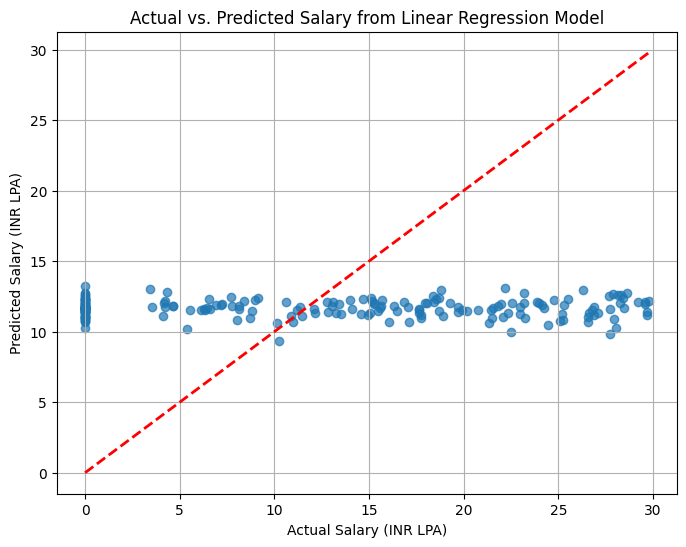

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)

# Plot a diagonal line (y=x) representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual Salary (INR LPA)')
plt.ylabel('Predicted Salary (INR LPA)')
plt.title('Actual vs. Predicted Salary from Linear Regression Model')
plt.grid(True)
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))